In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
!pip install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl && pip install torchvision
!pip install fastai
!pip install Pillow==4.0.0
!pip install PIL
!pip install image

    100% |████████████████████████████████| 2.0MB 12.7MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
  Using cached https://files.pythonhosted.org/packages/37/e8/b3fbf87b0188d22246678f8cd61e23e31caa1769ebc06f1664e2e5fe8a17/Pillow-4.0.0-cp36-cp36m-manylinux1_x86_64.whl
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL


In [0]:
!mkdir data && wget https://s3.amazonaws.com/fast-ai-imageclas/mnist_png.tgz
!tar -xvzf mnist_png.tgz -C data

In [0]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import os


In [0]:
!ls


clouderizer	     install_clouderizer_service.sh  updatestatus.1
clouderizer_init.sh  mnist_png.tgz		     updatestatus.2
clouderizer.jar      __pycache__		     updatestatus.3
clouderizer.service  sample_data		     updatestatus.4
colab_init.sh	     temp.sh			     updatestatus.5
colab.py	     train			     updatestatus.6
data		     updatestatus


In [0]:
PATH="data/mnist_png/"
os.listdir(PATH)

['training', 'testing']

In [0]:
!mv data/mnist_png/training /data/mnist_png/train
!mv data/mnist_png/testing /data/mnist_png/valid
os.listdir(PATH)

mv: cannot stat 'data/mnist_png/training': No such file or directory
mv: cannot stat 'data/mnist_png/testing': No such file or directory


['valid', 'train']

In [0]:
os.listdir(f'{PATH}valid')

['4', '9', '7', '2', '8', '3', '6', '5', '1', '0']

In [0]:
files = os.listdir(f'{PATH}valid/2')[:5]
files


['7729.png', '7977.png', '9123.png', '5823.png', '4656.png']

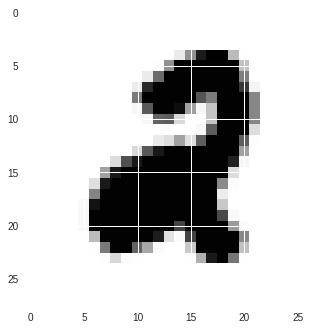

In [0]:
img = plt.imread(f'{PATH}valid/2/{files[0]}')
plt.imshow(img);

In [0]:
img.shape


(28, 28)

In [0]:
img[:4,:4]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [0]:
sz=224

In [0]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:02<00:00, 43208513.55it/s]


100%|██████████| 157/157 [00:50<00:00,  3.08it/s]


epoch      trn_loss   val_loss   accuracy   
    0      0.22957    0.112673   0.9659    
    1      0.182309   0.089052   0.973     



[array([0.08905]), 0.973]

In [0]:
# This is the label for a val data
data.val_y

array([0, 0, 0, ..., 9, 9, 9])

In [0]:
# from here we know that '0' is label 0 and '1' is label 1.
#very obvious in this case but useful for other data with different names 
data.classes


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [0]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(10000, 10)

In [0]:
log_preds[:10]

array([[ -0.02071,  -7.61835,  -4.91429,  -7.66587,  -7.96609,  -7.85802,  -5.86923,  -6.24488,  -7.24479,
         -5.11822],
       [ -0.00008, -13.78223,  -9.79274, -16.0867 , -15.72261, -16.46265, -11.31575, -12.54233, -14.05042,
        -11.80622],
       [ -0.00006, -13.58769, -11.0911 , -13.66002, -13.10654, -15.57088, -11.15493, -12.38729, -13.37607,
        -10.83288],
       [ -0.02995,  -8.81778,  -6.43231,  -6.57907,  -9.20883,  -4.37109,  -4.98621,  -8.14068,  -5.26373,
         -6.62636],
       [ -0.00039, -11.58035, -12.43648, -13.08126, -13.2856 , -13.30701,  -9.4586 , -11.65479, -10.28586,
         -8.28428],
       [ -0.00002, -14.93503, -13.49809, -14.74055, -13.00919, -12.99315, -11.29935, -15.21638, -12.97534,
        -14.27646],
       [ -0.00013, -11.71879,  -9.5318 , -12.96897, -12.40311, -14.5116 , -10.564  , -11.67484, -13.55173,
        -12.90069],
       [ -0.00113, -13.1808 ,  -8.77085, -11.87808, -11.33706, -10.30342,  -7.1884 , -11.46347, -10.21863,
    

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(9)

In [0]:
?np.argmax


In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')


Correctly classified


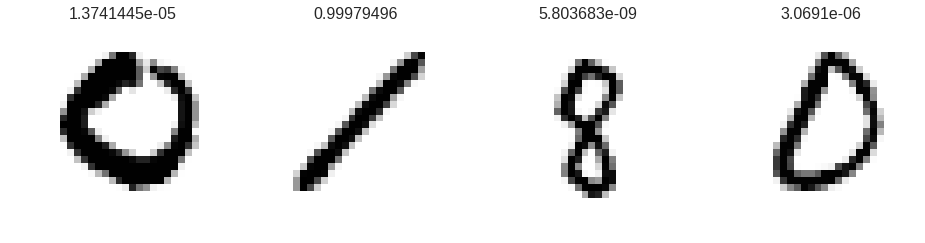

In [0]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


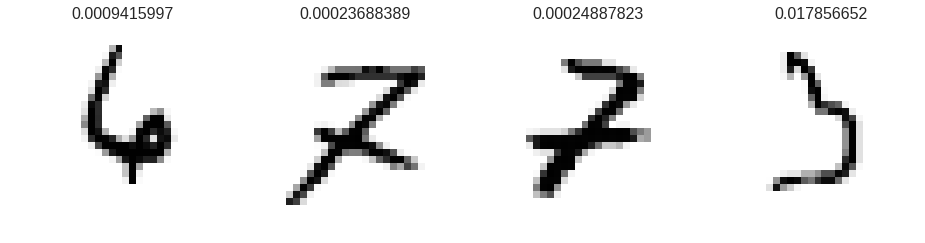

In [0]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")